In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential, model_from_json, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation, DepthwiseConv2D, AvgPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K


import os
import matplotlib.pyplot as plt

cwd = os.getcwd()
PATH = os.path.join(cwd, 'nonResized')

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
print(train_dir)

C:\Users\tonylizj\Documents\GitHub\flower-id\nonResized\train


In [3]:
batch_size = 16
epochs = 100
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [4]:
total_train, total_val = 0, 0

for category in os.listdir(train_dir):
    total_train += len(os.listdir(os.path.join(train_dir, category)))
for category in os.listdir(validation_dir):
    total_val += len(os.listdir(os.path.join(validation_dir, category)))

print("Training images: " + str(total_train))
print("Validation images: " + str(total_val))


Training images: 2850
Validation images: 1473


In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           width_shift_range=.15,
                                           height_shift_range=.15,
                                           horizontal_flip=True,
                                           zoom_range=0.5)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

sample_training_images, _ = next(train_data_gen)

Found 2850 images belonging to 5 classes.
Found 1473 images belonging to 5 classes.


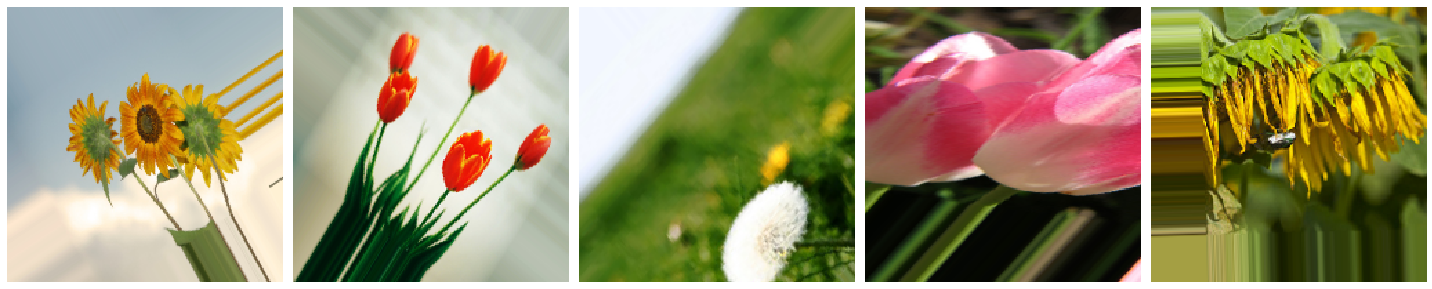

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(sample_training_images[:5])

In [7]:
'''
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
'''


model = Sequential()
model.add(Conv2D(32, 3, strides = 1, padding = "same", activation = "relu", input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(32, 3, strides = 1, padding = "same", activation = "relu"))

model.add(BatchNormalization())
model.add(MaxPooling2D(4))
model.add(Dropout(0.2))

model.add(Conv2D(64, 3, strides = 1, padding = "same", activation = "relu"))
model.add(Conv2D(64, 3, strides = 1, padding = "same", activation = "relu"))

model.add(BatchNormalization())
model.add(MaxPooling2D(4))
model.add(Dropout(0.2))

model.add(Conv2D(128, 3, strides = 1, padding = "same", activation = "relu"))
model.add(Conv2D(128, 3, strides = 1, padding = "same", activation = "relu"))

model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(4096, activation = "relu"))

model.add(Dropout(0.2))

model.add(Dense(4096, activation = "relu"))

model.add(Dropout(0.2))

model.add(Dense(1000, activation = "relu"))
model.add(Dense(5, activation = "softmax"))


#model = tf.keras.models.load_model('model.h5')

'''


model = tf.keras.models.load_model("model.h5")
'''

'\n\n\nmodel = tf.keras.models.load_model("model.h5")\n'

In [8]:
opt = tf.keras.optimizers.Adam(lr=0.001)

model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])




In [9]:
'''
K.set_value(model.optimizer.lr, 0.0001)
'''
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
    )


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 178 steps, validate for 92 steps
Epoch 1/100
178/178 [==============================] - 194s 1s/step - loss: 2.2510 - accuracy: 0.3843 - val_loss: 1.7578 - val_accuracy: 0.2595

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

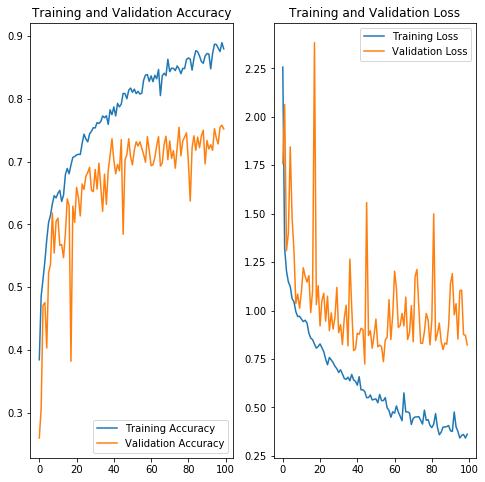

In [11]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
model.summary()

model.save("model.h5")

'''
model_json = model.to_json()

with open("model_num.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('model_weights.h5')
'''

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 64)        2

'\nmodel_json = model.to_json()\n\nwith open("model_num.json", "w") as json_file:\n    json_file.write(model_json)\nmodel.save_weights(\'model_weights.h5\')\n'